In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.testing import assert_frame_equal

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)
pd.set_option('display.max_rows', 20)

Leitura das bases de dados

In [3]:
vendas = pd.read_csv('Dados/vendas-limpo.csv')
devolvidos = pd.read_csv('Dados/pedidos-devolvidos.csv')

Início da Análise Exploratória dos Dados

In [4]:
display(vendas.head(5))

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor,Horario,DataBR
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,16:14:00,30/03/2021
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,11:11:00,11/11/2021
2,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,12:08:00,06/04/2021
3,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,15:33:00,27/10/2021
4,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98,08:38:00,16/11/2021


In [5]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19947 entries, 0 to 19946
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   N° da fatura    19947 non-null  object 
 1   Data da fatura  19947 non-null  object 
 2   ID Cliente      18524 non-null  float64
 3   País            19947 non-null  object 
 4   Quantidade      19947 non-null  int64  
 5   Valor           19947 non-null  float64
 6   Horario         19947 non-null  object 
 7   DataBR          19947 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.2+ MB


In [6]:
# Convertendo a coluna 'Data da fatura' para o formato datetime64
vendas['Data da fatura'] = pd.to_datetime(vendas['Data da fatura'], format='%Y-%m-%d %H:%M:%S')

In [7]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19947 entries, 0 to 19946
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   N° da fatura    19947 non-null  object        
 1   Data da fatura  19947 non-null  datetime64[ns]
 2   ID Cliente      18524 non-null  float64       
 3   País            19947 non-null  object        
 4   Quantidade      19947 non-null  int64         
 5   Valor           19947 non-null  float64       
 6   Horario         19947 non-null  object        
 7   DataBR          19947 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.2+ MB


In [8]:
vendas.describe()

,Data da fatura,ID Cliente,Quantidade,Valor
count,19947,18524.000000,19947.000000,19947.000000
mean,2021-06-29 09:00:23.937434112,15266.958486,279.426982,532.866706
min,2020-12-01 08:26:00,12346.000000,1.000000,0.380000
25%,2021-03-28 15:32:30,13777.000000,70.000000,152.180000
50%,2021-07-07 15:31:00,15179.000000,151.000000,303.680000
75%,2021-10-11 09:23:30,16779.000000,296.000000,494.955000
max,2021-12-09 12:50:00,18287.000000,80995.000000,168469.600000
std,NaN,1733.964226,954.533218,1774.821758


In [9]:
vendas['País'].unique()

array(['United Kingdom', 'Germany', 'EIRE', 'France', 'Sweden', 'Belgium',
       'Italy', 'Israel', 'Portugal', 'Netherlands', 'Channel Islands',
       'Switzerland', 'Finland', 'Spain', 'Japan', 'United Arab Emirates',
       'Singapore', 'Norway', 'Hong Kong', 'Denmark', 'Australia', 'USA',
       'Lithuania', 'European Community', 'Austria', 'Cyprus', 'Iceland',
       'Malta', 'Canada', 'Greece', 'Poland', 'Czech Republic', 'Lebanon',
       'Brazil', 'South Africa', 'Bahrain', 'Saudi Arabia'], dtype=object)

In [10]:
# Excluindo as linhas onde o valor na coluna 'País' é 'European Community'
vendas.drop(vendas[vendas['País'] == 'European Community'].index, inplace=True)
devolvidos.drop(devolvidos[devolvidos['País'] == 'European Community'].index, inplace=True)

## Vendas

### Quantidade de vendas (faturas) por país

In [11]:
# Contando o número de faturas emitidas por país
faturas_por_pais = vendas.groupby('País')['N° da fatura'].nunique().sort_values(ascending=False).reset_index()

# Calculando a porcentagem de faturas por país
faturas_por_pais['Porcentagem %'] = (faturas_por_pais['N° da fatura'] / faturas_por_pais['N° da fatura'].sum()) * 100

# Limitando os valores da coluna 'Porcentagem' a 2 casas decimais
faturas_por_pais['Porcentagem %'] = faturas_por_pais['Porcentagem %'].round(2)

display(faturas_por_pais[['País', 'N° da fatura', 'Porcentagem %']].transpose())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
País,United Kingdom,Germany,France,EIRE,Belgium,Netherlands,Spain,Portugal,Australia,Switzerland,Finland,Italy,Sweden,Norway,Channel Islands,Japan,Poland,Denmark,Austria,Cyprus,Hong Kong,Israel,Iceland,Singapore,Canada,USA,Greece,Malta,Lithuania,Bahrain,United Arab Emirates,Czech Republic,Brazil,South Africa,Lebanon,Saudi Arabia
N° da fatura,18019,457,392,288,98,94,90,58,57,54,41,38,36,36,26,19,19,18,17,16,11,8,7,7,6,5,5,5,4,3,3,2,1,1,1,1
Porcentagem %,90.35,2.29,1.97,1.44,0.49,0.47,0.45,0.29,0.29,0.27,0.21,0.19,0.18,0.18,0.13,0.1,0.1,0.09,0.09,0.08,0.06,0.04,0.04,0.04,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01


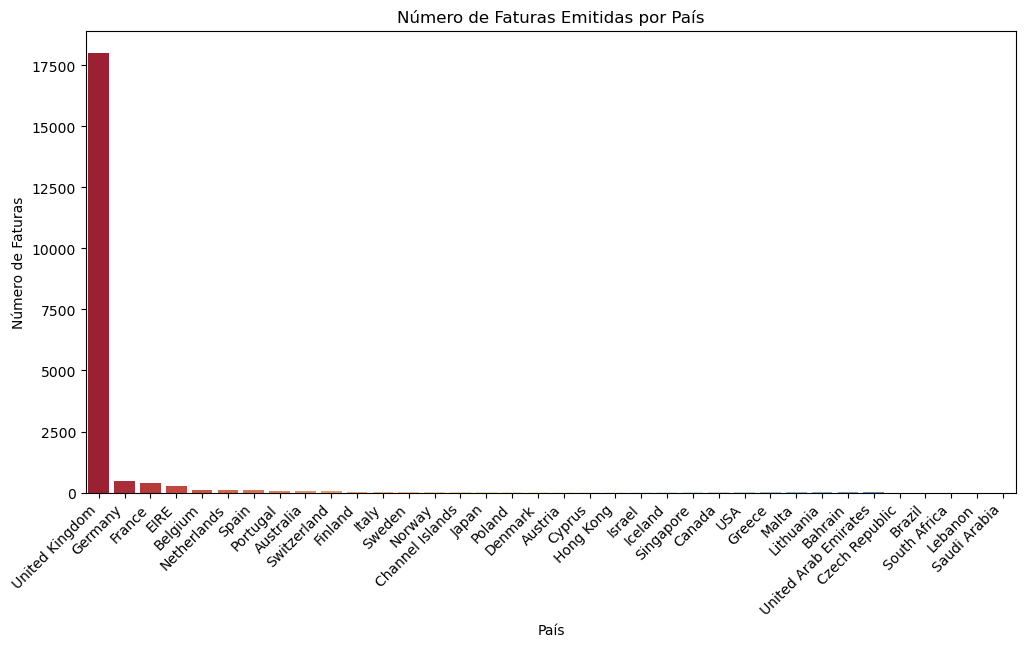

In [12]:
# Gráfico de barras com o total de faturas por país
plt.figure(figsize=(12, 6))
sns.barplot(x='País', y='N° da fatura', data=faturas_por_pais, palette='RdYlBu')
plt.title('Número de Faturas Emitidas por País')
plt.xlabel('País')
plt.ylabel('Número de Faturas')
plt.xticks(rotation=45, ha='right')
plt.show()

### Valor total das vendas por país

In [13]:
# Agrupando o DataFrame por país e somando os valores
valor_por_pais = vendas.groupby('País')['Valor'].sum().sort_values(ascending=False).reset_index()

# Calculando a porcentagem do valor por país
valor_por_pais['Porcentagem %'] = (valor_por_pais['Valor'] / valor_por_pais['Valor'].sum()) * 100

# Limitando os valores da coluna 'Porcentagem' a 2 casas decimais
valor_por_pais['Porcentagem %'] = valor_por_pais['Porcentagem %'].round(2)

display(valor_por_pais[['País', 'Valor', 'Porcentagem %']].transpose())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
País,United Kingdom,Netherlands,EIRE,Germany,France,Australia,Spain,Switzerland,Belgium,Sweden,Japan,Norway,Portugal,Finland,Singapore,Channel Islands,Denmark,Italy,Hong Kong,Cyprus,Austria,Israel,Poland,Greece,Iceland,Canada,USA,Malta,United Arab Emirates,Lebanon,Lithuania,Brazil,South Africa,Czech Republic,Bahrain,Saudi Arabia
Valor,8993543.47,285446.34,283249.06,228867.14,208779.98,138521.31,61577.11,57089.9,41196.34,38378.33,37392.44,36165.44,33747.1,22546.08,21279.29,20450.44,18955.34,17483.24,15691.8,13590.38,10198.68,8135.26,7334.65,4760.52,4310.0,3666.38,3580.39,2725.59,1902.28,1693.88,1661.06,1143.6,1002.31,826.74,754.14,145.92
Porcentagem %,84.62,2.69,2.67,2.15,1.96,1.3,0.58,0.54,0.39,0.36,0.35,0.34,0.32,0.21,0.2,0.19,0.18,0.16,0.15,0.13,0.1,0.08,0.07,0.04,0.04,0.03,0.03,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.0


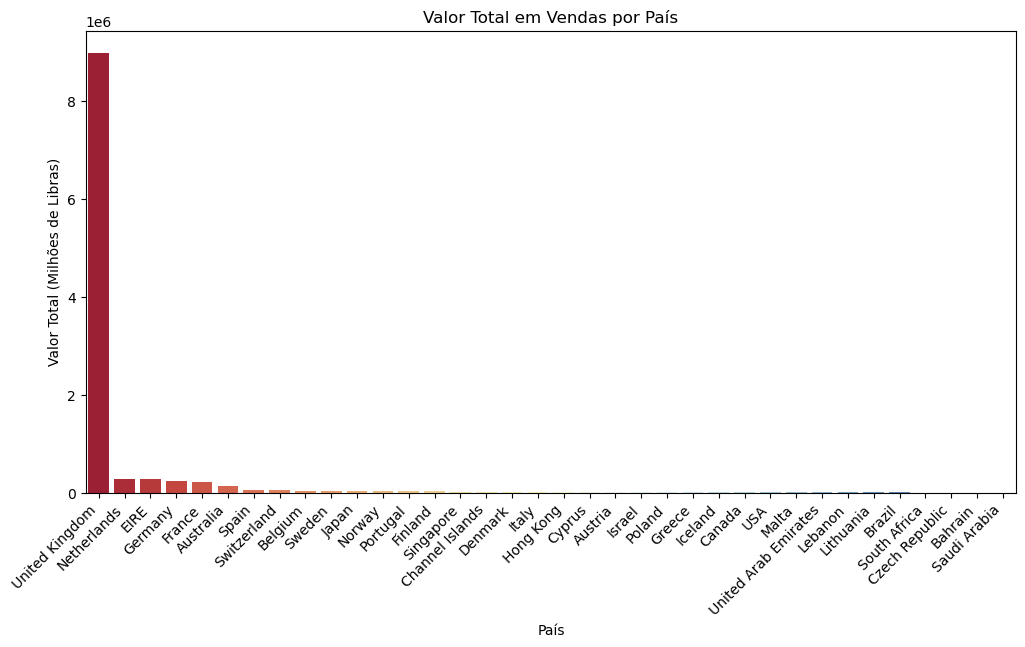

In [14]:
total_por_pais = vendas.groupby('País')['Valor'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='País', y='Valor', data=total_por_pais, palette='RdYlBu')
plt.title('Valor Total em Vendas por País')
plt.xlabel('País')
plt.ylabel('Valor Total (Milhões de Libras)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Valores mínimo, médio e máximo por fatura de cada país (Ticket Médio)

In [15]:
# Agrupando o DataFrame por país e calculando o valor mínimo, médio e máximo
estatisticas_por_pais = vendas.groupby('País')['Valor'].agg(['min', 'mean', 'max']).round(2).reset_index()

# Renomeando as colunas
estatisticas_por_pais.columns = ['País', 'Valor Mínimo', 'Valor Médio', 'Valor Máximo']

# Classificando a tabela a partir dos países com maior 'Valor Médio'
estatisticas_por_pais = estatisticas_por_pais.sort_values(by='Valor Médio', ascending=False).reset_index()

display((estatisticas_por_pais).transpose())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
index,28,23,0,19,20,15,4,31,32,9,17,24,29,10,14,7,6,33,30,34,16,5,1,26,11,22,12,13,35,18,3,21,8,25,2,27
País,Singapore,Netherlands,Australia,Japan,Lebanon,Hong Kong,Brazil,Sweden,Switzerland,Denmark,Israel,Norway,South Africa,EIRE,Greece,Cyprus,Channel Islands,USA,Spain,United Arab Emirates,Iceland,Canada,Austria,Portugal,Finland,Malta,France,Germany,United Kingdom,Italy,Belgium,Lithuania,Czech Republic,Poland,Bahrain,Saudi Arabia
Valor Mínimo,999.26,2.08,61.2,15.3,1693.88,160.0,1143.6,8.5,4.95,168.9,15.7,4.5,1002.31,1.45,387.31,15.0,33.0,269.96,13.25,37.5,224.82,51.56,153.76,27.0,69.61,30.0,4.63,3.0,0.38,12.75,34.0,15.0,277.48,25.0,89.0,145.92
Valor Médio,3039.9,3036.66,2430.2,1968.02,1693.88,1426.53,1143.6,1066.06,1057.22,1053.07,1016.91,1004.6,1002.31,983.5,952.1,849.4,786.56,716.08,684.19,634.09,615.71,611.06,599.92,581.85,549.9,545.12,532.6,500.8,499.11,460.09,420.37,415.26,413.37,386.03,251.38,145.92
Valor Máximo,6068.06,20277.92,22775.93,5735.24,1693.88,2653.95,1143.6,5296.96,6207.67,3978.99,4873.81,4366.78,1002.31,16774.72,2661.24,2876.85,2060.03,1579.51,4146.34,975.54,1294.32,1217.64,1542.08,2271.62,2474.62,905.5,8895.76,9341.26,168469.6,1757.55,1491.59,1145.06,549.26,981.95,459.4,145.92


### Maiores mercados fora do Reino Unido (Ticket médio, Valor total e Qtd de faturas)

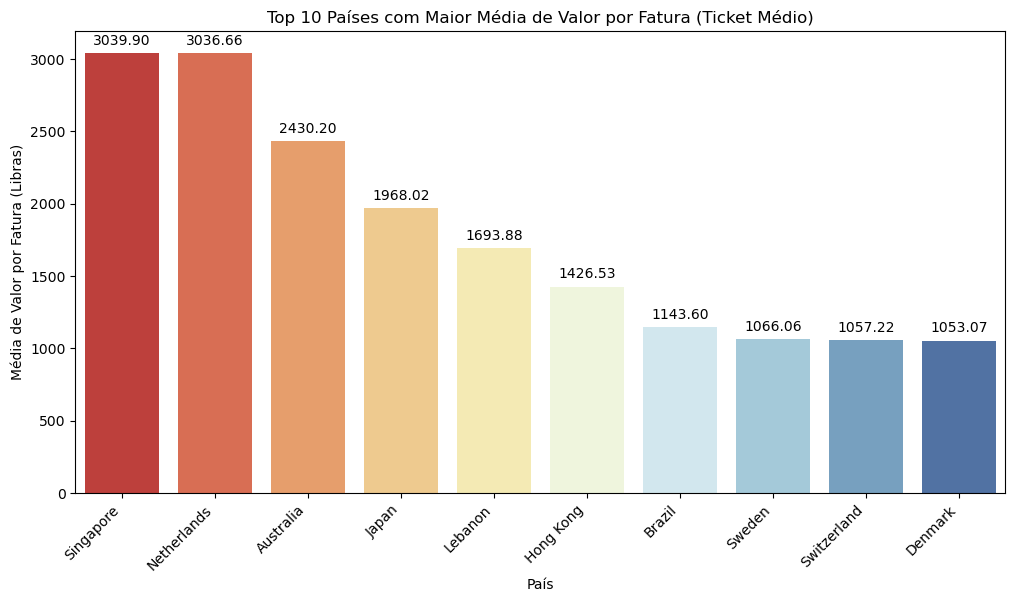

In [16]:
# Agrupando o DataFrame por país e calculando a média do valor por fatura
media_por_pais = vendas.groupby('País')['Valor'].mean().sort_values(ascending=False).head(10).reset_index()

# Criando um gráfico de barras usando Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='País', y='Valor', data=media_por_pais, palette='RdYlBu')
plt.title('Top 10 Países com Maior Média de Valor por Fatura (Ticket Médio)')
plt.xlabel('País')
plt.ylabel('Média de Valor por Fatura (Libras)')
plt.xticks(rotation=45, ha='right')

# Add valores no topo das barras usando o método 'annotate'
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),                      #Obtem a altura das barras c/ 2 casas decimais
                (p.get_x() + p.get_width() / 2., p.get_height()),   #Determina a posição do topo das barras
                ha = 'center', va = 'center',                       #Configura o alinhamento V e H dos rótulos
                xytext = (0, 9),                                    #Adiciona um deslocamento dos rótulos
                textcoords = 'offset points')                       #Define as coordenadas do deslocamento

plt.show()

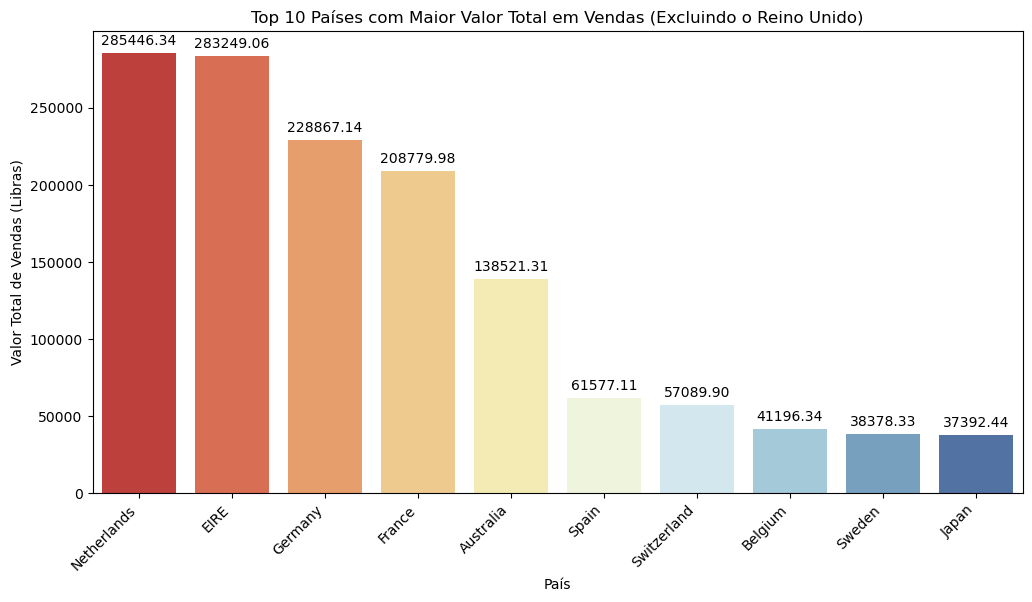

In [17]:
vendas_sem_uk = vendas[vendas['País'] != 'United Kingdom']

total_por_pais = vendas_sem_uk.groupby('País')['Valor'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='País', y='Valor', data=total_por_pais, palette='RdYlBu')
plt.title('Top 10 Países com Maior Valor Total em Vendas (Excluindo o Reino Unido)')
plt.xlabel('País')
plt.ylabel('Valor Total de Vendas (Libras)')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()

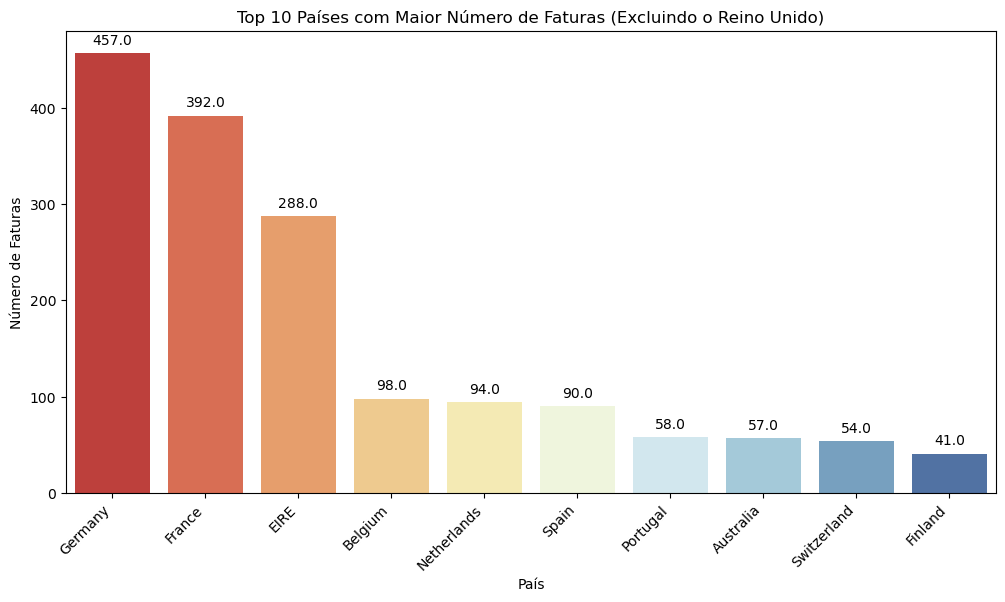

In [18]:
faturas_por_pais = vendas_sem_uk.groupby('País')['N° da fatura'].nunique().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='País', y='N° da fatura', data=faturas_por_pais, palette='RdYlBu')
plt.title('Top 10 Países com Maior Número de Faturas (Excluindo o Reino Unido)')
plt.xlabel('País')
plt.ylabel('Número de Faturas')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()

### Menores mercados fora do Reino Unido (Ticket médio, Valor total e Qtd de faturas)

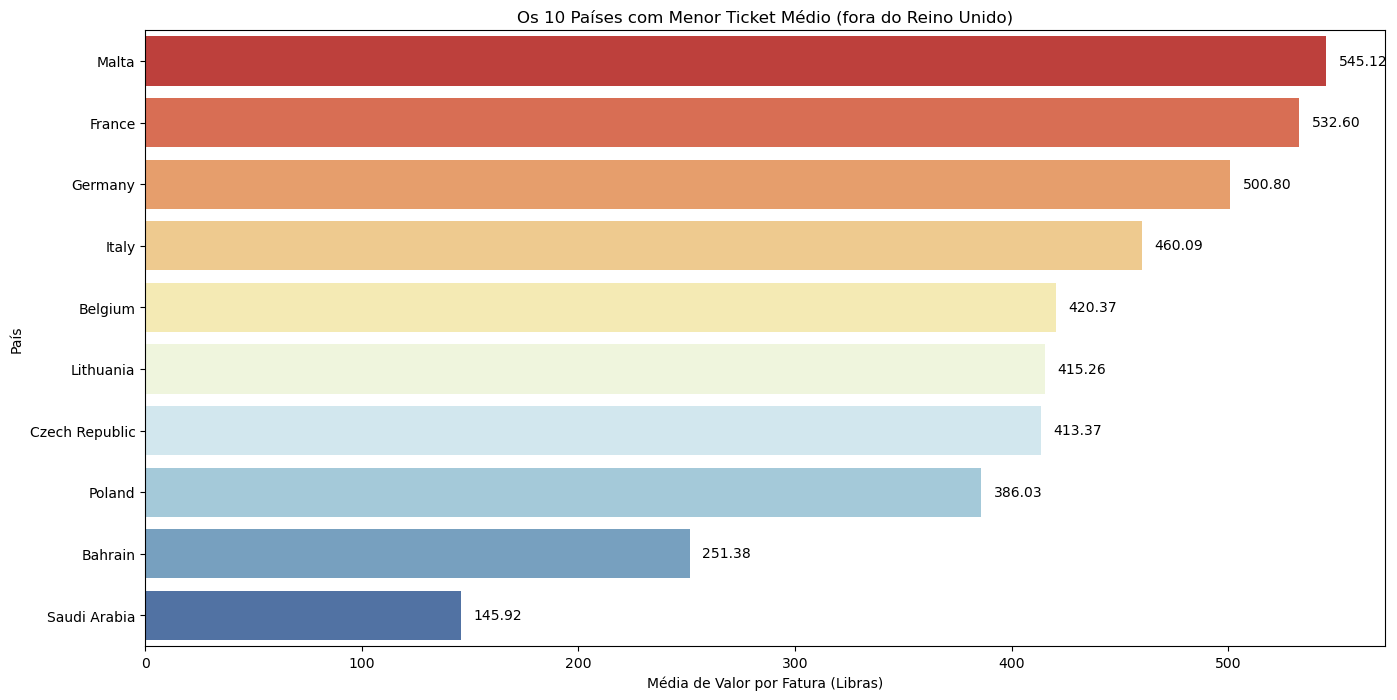

In [19]:
# Excluindo 'European Community' e 'United Kingdom' do DataFrame
vendas_filtradas = vendas[~vendas['País'].isin(['European Community', 'United Kingdom'])]

# Agrupando o DataFrame filtrado por país e calculando a média do valor por fatura
media_por_pais = vendas_filtradas.groupby('País')['Valor'].mean().sort_values(ascending=False).tail(10).reset_index()

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Valor', y='País', data=media_por_pais, palette='RdYlBu', orient='h')
plt.title('Os 10 Países com Menor Ticket Médio (fora do Reino Unido)')
plt.xlabel('Média de Valor por Fatura (Libras)')
plt.ylabel('País')

# Adicionando os valores no final das barras
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                va='center', xytext=(9, 0), textcoords='offset points')

plt.show()

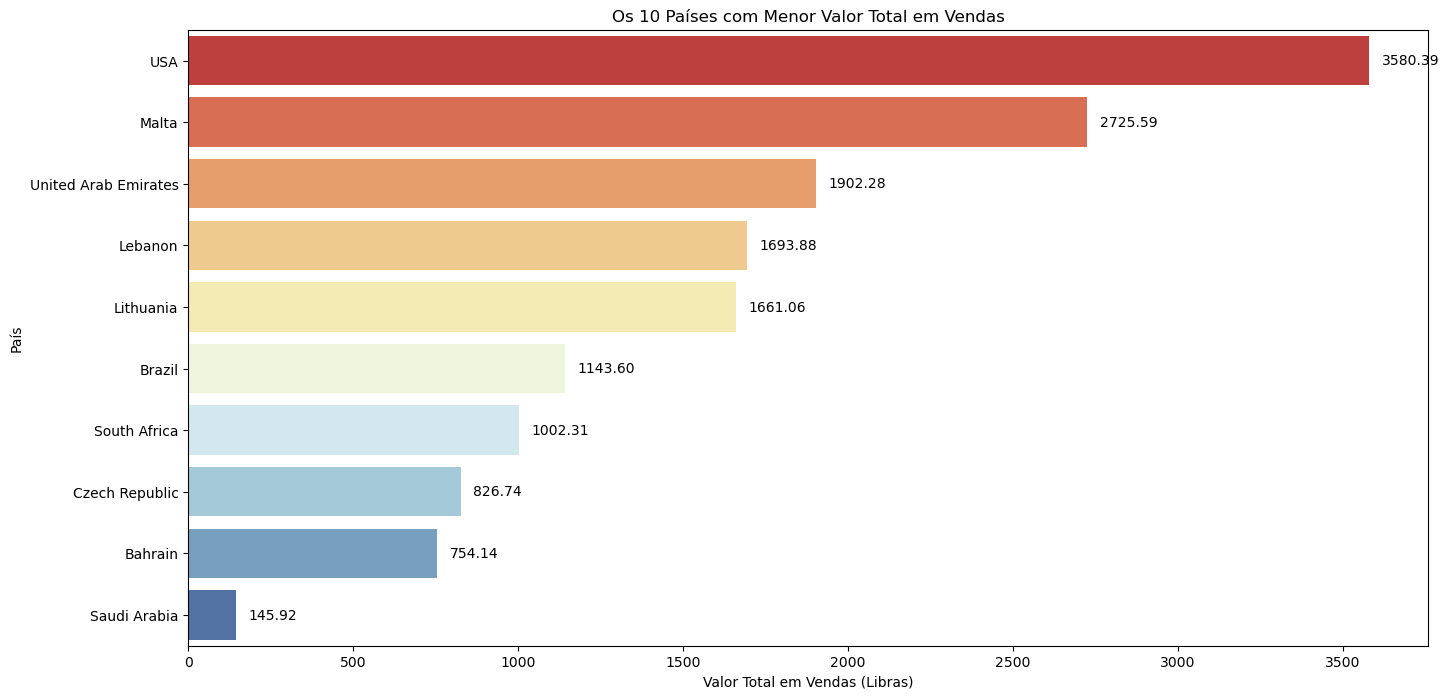

In [20]:
# Agrupando o DataFrame filtrado por país e calculando o valor total em vendas
total_por_pais = vendas_filtradas.groupby('País')['Valor'].sum().sort_values(ascending=False).tail(10).reset_index()

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Valor', y='País', data=total_por_pais, palette='RdYlBu', orient='h')
plt.title('Os 10 Países com Menor Valor Total em Vendas')
plt.xlabel('Valor Total em Vendas (Libras)')
plt.ylabel('País')

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                va='center', xytext=(9, 0), textcoords='offset points')

plt.show()

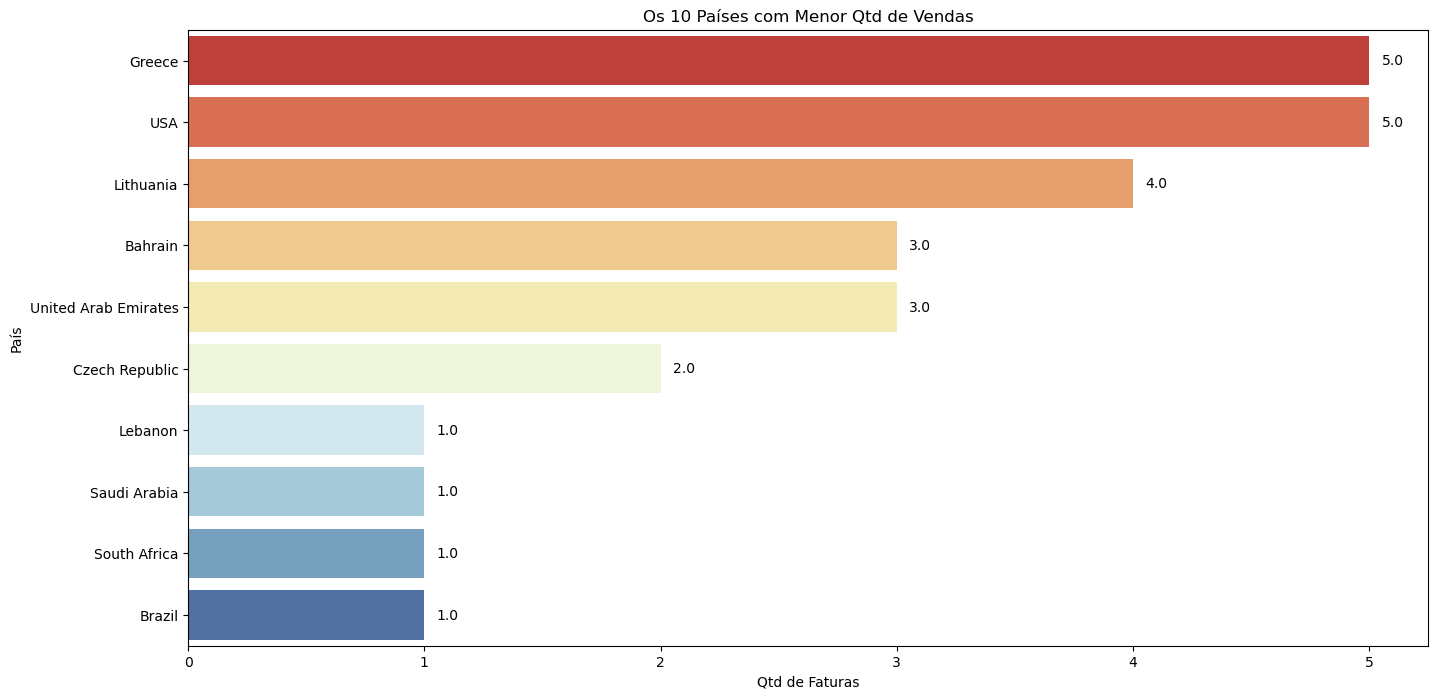

In [21]:
faturas_por_pais = vendas_filtradas.groupby('País')['N° da fatura'].nunique().sort_values(ascending=False).tail(10).reset_index()

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='N° da fatura', y='País', data=faturas_por_pais, palette='RdYlBu', orient='h')
plt.title('Os 10 Países com Menor Qtd de Vendas')
plt.xlabel('Qtd de Faturas')
plt.ylabel('País')

for p in ax.patches:
    ax.annotate(str(p.get_width()), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                va='center', xytext=(9, 0), textcoords='offset points')

plt.show()

## Período

### Características do mercados no período

In [22]:
# Encontrando a data inicial e final
data_inicial = vendas['Data da fatura'].min()
data_final = vendas['Data da fatura'].max()

print(f'Data Inicial: {data_inicial}')
print(f'Data Final: {data_final}')

Data Inicial: 2020-12-01 08:26:00
Data Final: 2021-12-09 12:50:00


In [23]:
# Criando uma nova coluna 'Mês' no DataFrame
vendas['Mês'] = vendas['Data da fatura'].dt.to_period('M')

# Agrupando por mês e calculando o total de vendas
total_vendas_por_mes = vendas.groupby('Mês')['Valor'].sum().reset_index()

print(total_vendas_por_mes)

        Mês       Valor
0   2020-12   823707.08
1   2021-01   688841.33
2   2021-02   520165.78
3   2021-03   700205.01
4   2021-04   535228.70
5   2021-05   767695.94
6   2021-06   760923.84
7   2021-07   716417.68
8   2021-08   758196.13
9   2021-09  1054854.02
10  2021-10  1154320.20
11  2021-11  1508443.54
12  2021-12   638792.68


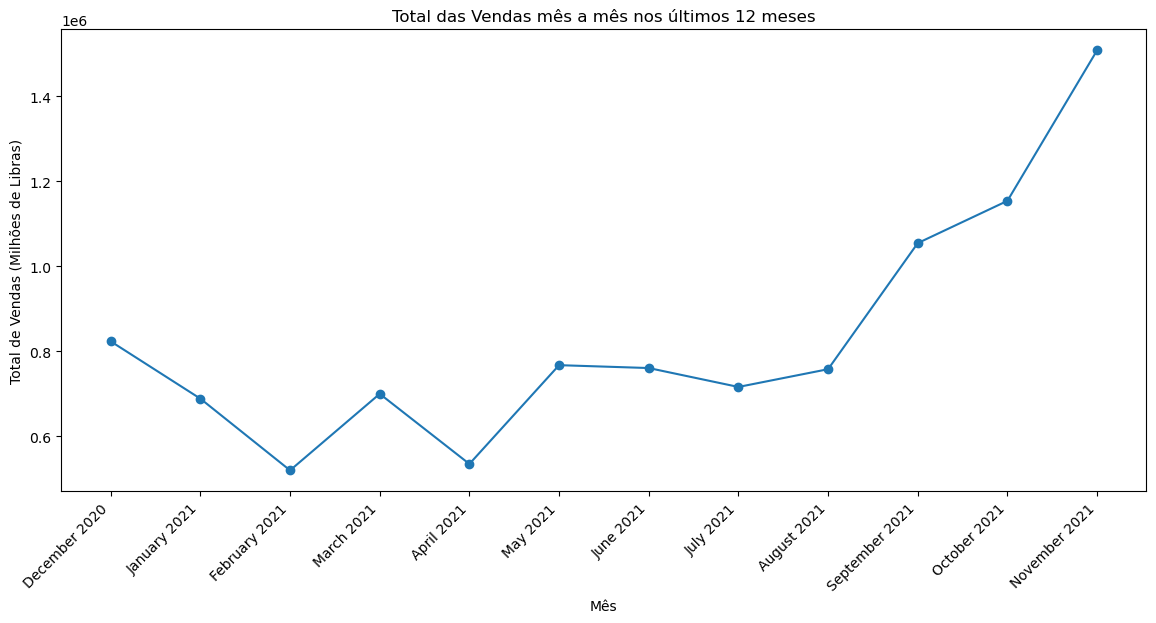

In [24]:
vendas['Mês e Ano'] = vendas['Data da fatura'].dt.to_period('M')

# Excluindo as vendas do último mês que não fechou(dezembro de 2021)
vendas = vendas[vendas['Mês e Ano'] != '2021-12']

# Agrupando por mês e calculando o total de vendas
total_vendas_por_mes_ano = vendas.groupby('Mês e Ano')['Valor'].sum().reset_index()

# Convertendo os períodos para strings contendo os nomes completos dos meses e anos
total_vendas_por_mes_ano['Mês'] = total_vendas_por_mes_ano['Mês e Ano'].dt.strftime('%B %Y')

# Criando um gráfico de linha
plt.figure(figsize=(14, 6))
plt.plot(total_vendas_por_mes_ano['Mês'], total_vendas_por_mes_ano['Valor'], marker='o', linestyle='-')
plt.title('Total das Vendas mês a mês nos últimos 12 meses')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas (Milhões de Libras)')
plt.xticks(rotation=45, ha='right')  # Ajustando a rotação dos rótulos do eixo X

plt.show()

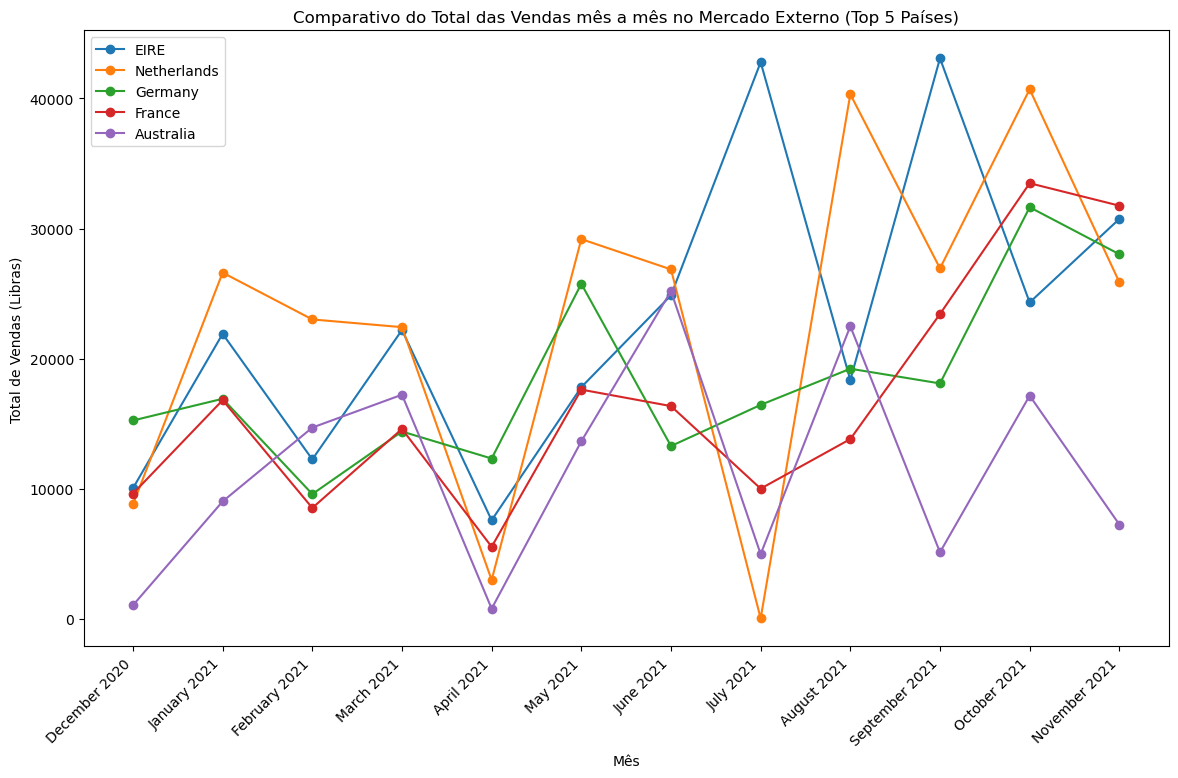

In [25]:
# Agrupando por país e mês, calculando o total de vendas para os 5 países que mais venderam (excluindo o 'United Kingdom')
top_paises = vendas[vendas['País'] != 'United Kingdom'].groupby(['País', 'Mês e Ano'])['Valor'].sum().reset_index()
top5_paises = top_paises.groupby('País')['Valor'].sum().sort_values(ascending=False).head(5).index

# Convertendo os períodos para strings contendo os nomes completos dos meses e anos
top_paises['Mês'] = top_paises['Mês e Ano'].dt.strftime('%B %Y')

# Criando um gráfico de linha para cada país através de um laço 'for'
plt.figure(figsize=(14, 8))
for pais in top5_paises:
    dados_pais = top_paises[top_paises['País'] == pais]
    plt.plot(dados_pais['Mês'], dados_pais['Valor'], marker='o', label=pais)

plt.title('Comparativo do Total das Vendas mês a mês no Mercado Externo (Top 5 Países)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas (Libras)')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.show()

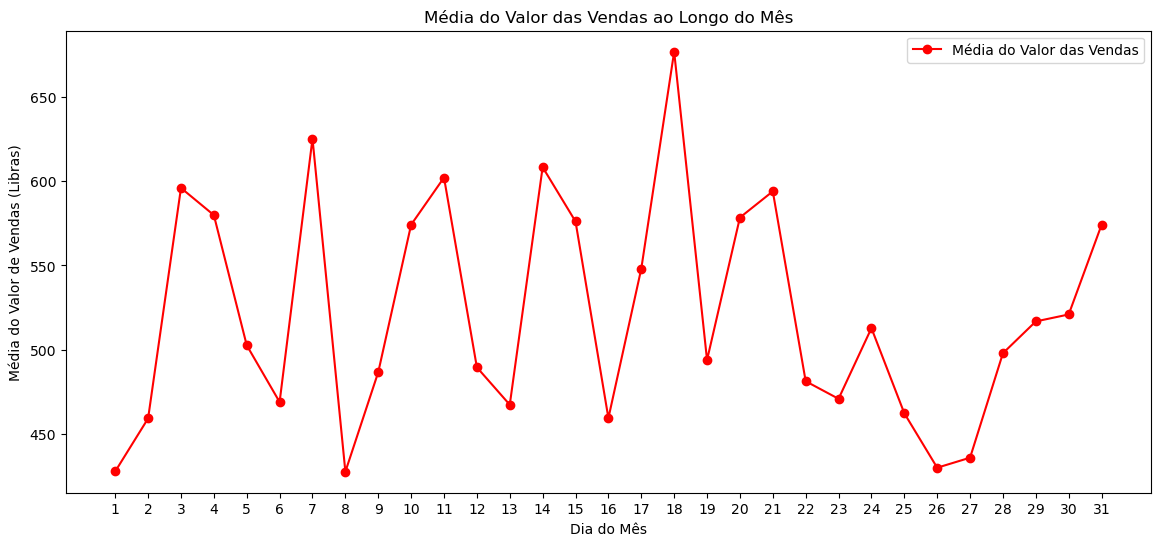

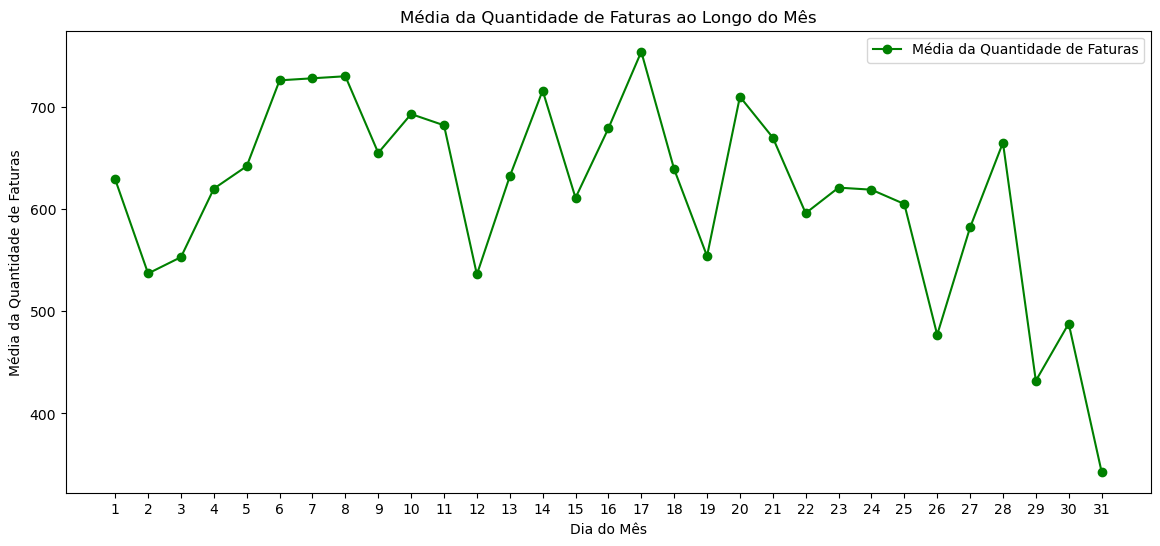

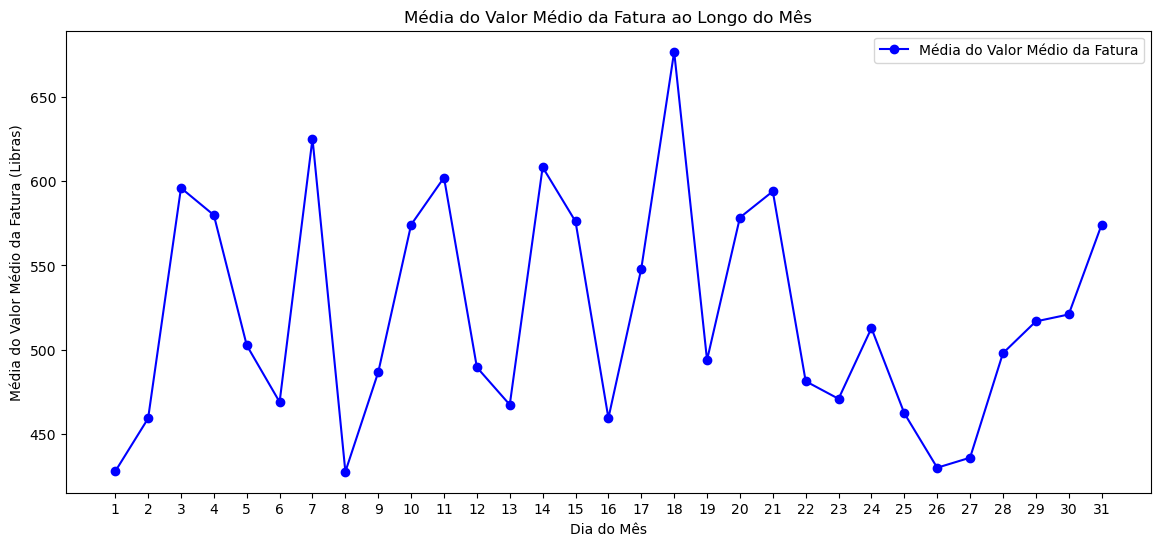

In [26]:
# Criando coluna 'Dia do Mês' para representar cada dia no DataFrame
vendas['Dia do Mês'] = vendas['Data da fatura'].dt.day

# Criando as medidas de média, faturas e valor por dia de cada mês
media_valor_vendas = vendas.groupby('Dia do Mês')['Valor'].mean()
media_quantidade_faturas = vendas.groupby('Dia do Mês')['N° da fatura'].nunique()
media_valor_medio_fatura = vendas.groupby('Dia do Mês')['Valor'].mean()

#Criando os 3 gráficos com as medidas de média, faturas e valor por dia de cada mês

# Gráfico da média do valor de vendas por dia do mês
plt.figure(figsize=(14, 6))
plt.plot(media_valor_vendas.index, media_valor_vendas.values, marker='o', label='Média do Valor das Vendas', color='red')
plt.title('Média do Valor das Vendas ao Longo do Mês')
plt.xlabel('Dia do Mês')
plt.ylabel('Média do Valor de Vendas (Libras)')
plt.xticks(range(1, 32))  # Um ponto para cada dia do mês
plt.legend()
plt.show()

# Gráfico da média de quantidade de faturas por dia do mês
plt.figure(figsize=(14, 6))
plt.plot(media_quantidade_faturas.index, media_quantidade_faturas.values, marker='o', label='Média da Quantidade de Faturas', color='green')
plt.title('Média da Quantidade de Faturas ao Longo do Mês')
plt.xlabel('Dia do Mês')
plt.ylabel('Média da Quantidade de Faturas')
plt.xticks(range(1, 32))
plt.legend()
plt.show()

# Gráfico da média do valor médio de cada fatura em cada dia do mês
plt.figure(figsize=(14, 6))
plt.plot(media_valor_medio_fatura.index, media_valor_medio_fatura.values, marker='o', label='Média do Valor Médio da Fatura', color='blue')
plt.title('Média do Valor Médio da Fatura ao Longo do Mês')
plt.xlabel('Dia do Mês')
plt.ylabel('Média do Valor Médio da Fatura (Libras)')
plt.xticks(range(1, 32))
plt.legend()
plt.show()

## Devoluções

In [27]:
devolvidos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5173 entries, 0 to 5173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   N° da fatura    5173 non-null   object 
 1   Data da fatura  5173 non-null   object 
 2   ID Cliente      3653 non-null   float64
 3   País            5173 non-null   object 
 4   Quantidade      5173 non-null   int64  
 5   Valor           5173 non-null   float64
 6   Horario         5173 non-null   object 
 7   DataBR          5173 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 363.7+ KB


In [28]:
display(devolvidos.head(5))

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor,Horario,DataBR
0,C570727,2021-10-12 11:32:00,12471.0,Germany,-1,-1.45,11:32:00,12/10/2021
1,C543628,2021-02-10 15:51:00,16558.0,United Kingdom,-5,-9.25,15:51:00,10/02/2021
2,542418,2021-01-27 17:39:00,NaN,United Kingdom,-17,0.00,17:39:00,27/01/2021
3,C553508,2021-05-17 13:44:00,14000.0,United Kingdom,-3,-1.95,13:44:00,17/05/2021
4,C577693,2021-11-21 11:48:00,12628.0,Germany,-3,-16.85,11:48:00,21/11/2021


In [29]:
devolvidos.describe()

,ID Cliente,Quantidade,Valor
count,3653.000000,5173.000000,5173.000000
mean,15097.850534,-93.664218,-177.637388
std,1721.526284,1572.393141,2763.797703
min,12346.000000,-80995.000000,-168469.600000
25%,13590.000000,-21.000000,-29.540000
50%,14916.000000,-5.000000,-10.080000
75%,16566.000000,-2.000000,0.000000
max,18282.000000,1.000000,0.000000


### Países com maior e menor quantidade e valor total em devoluções

In [30]:
# Convertendo a coluna 'Data da fatura' para o tipo datetime
devolvidos['Data da fatura'] = pd.to_datetime(devolvidos['Data da fatura'], format='%Y-%m-%d %H:%M:%S')

# Excluindo a linha com o valor 'European Community' do DataFrame
devolvidos = devolvidos[devolvidos['País'] != 'European Community']

# Criando uma nova coluna 'País' para representar a quantidade de devoluções por país
quantidade_devolucoes = devolvidos.groupby('País')['N° da fatura'].count().reset_index()
quantidade_devolucoes.columns = ['País', 'Quantidade de Devoluções']

# Criando uma nova coluna 'Valor Total de Devoluções' por país
valor_total_devolucoes = devolvidos.groupby('País')['Valor'].sum().reset_index()
valor_total_devolucoes.columns = ['País', 'Valor Total de Devoluções']

# Calculando a porcentagem que cada país representa do total de devoluções
total_devolucoes = valor_total_devolucoes['Valor Total de Devoluções'].sum()
valor_total_devolucoes['Porcentagem do Total %'] = (valor_total_devolucoes['Valor Total de Devoluções'] / total_devolucoes) * 100

# Ordenando a tabela pelo valor total de devoluções em ordem decrescente
valor_total_devolucoes = valor_total_devolucoes.sort_values(by='Valor Total de Devoluções', ascending=True)

display((valor_total_devolucoes).transpose())


,28,8,10,23,11,24,13,21,16,27,25,0,19,18,26,5,15,4,3,14,17,9,2,7,20,6,12,1,22
País,United Kingdom,EIRE,France,Singapore,Germany,Spain,Hong Kong,Portugal,Japan,USA,Sweden,Australia,Norway,Netherlands,Switzerland,Cyprus,Italy,Channel Islands,Belgium,Israel,Malta,Finland,Bahrain,Denmark,Poland,Czech Republic,Greece,Austria,Saudi Arabia
Valor Total de Devoluções,-837405.82,-20177.14,-12311.21,-12158.9,-7168.93,-6802.53,-5574.76,-4380.08,-2075.75,-1849.47,-1782.42,-1444.04,-1001.98,-784.8,-704.55,-644.09,-592.73,-364.15,-285.38,-227.44,-220.12,-219.34,-205.74,-187.2,-121.51,-119.02,-50.0,-44.36,-14.75
Porcentagem do Total %,91.129527,2.195749,1.33975,1.323175,0.780149,0.740276,0.606666,0.476656,0.225891,0.201266,0.193969,0.157146,0.109039,0.085405,0.076672,0.070092,0.064503,0.039628,0.031056,0.024751,0.023954,0.023869,0.022389,0.020372,0.013223,0.012952,0.005441,0.004827,0.001605


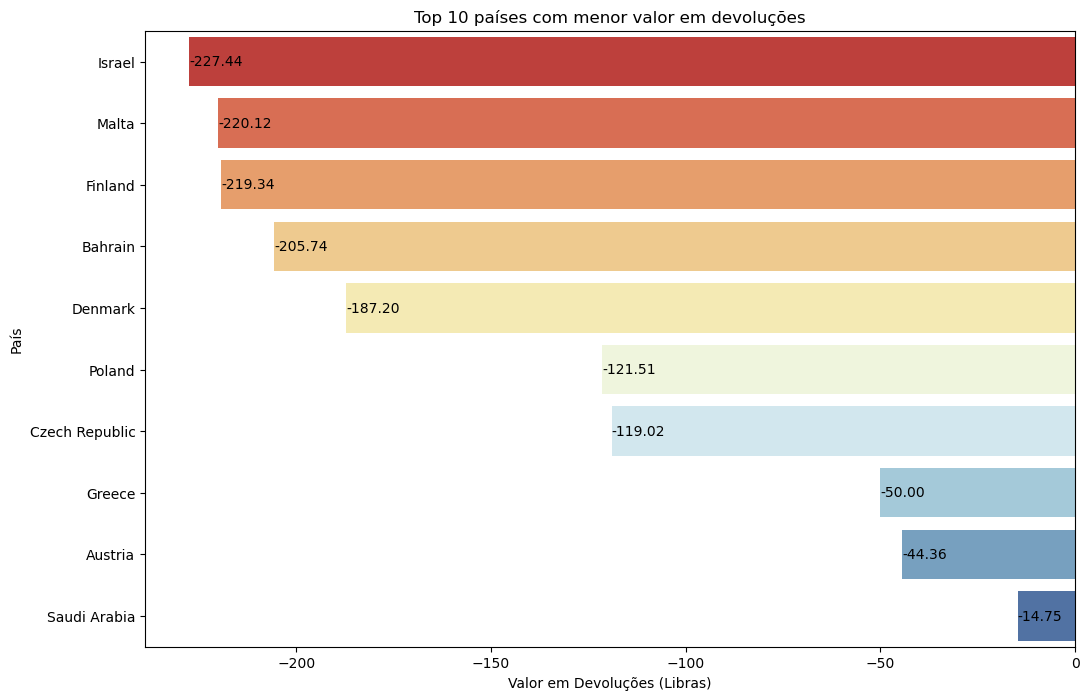

In [31]:
# Selecionando os 10 países com menor número de devoluções
top_paises_devolucoes = devolvidos.groupby('País')['Valor'].sum().sort_values(ascending=True).tail(10).reset_index()

# Criando um gráfico de barras horizontais com escala de cor
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Valor', y='País', data=top_paises_devolucoes, palette='RdYlBu', orient='h')

# Adicionando legendas nas barras
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='left', va='center')

# Adicionando rótulos e título
plt.title('Top 10 países com menor valor em devoluções')
plt.xlabel('Valor em Devoluções (Libras)')
plt.ylabel('País')

plt.show()

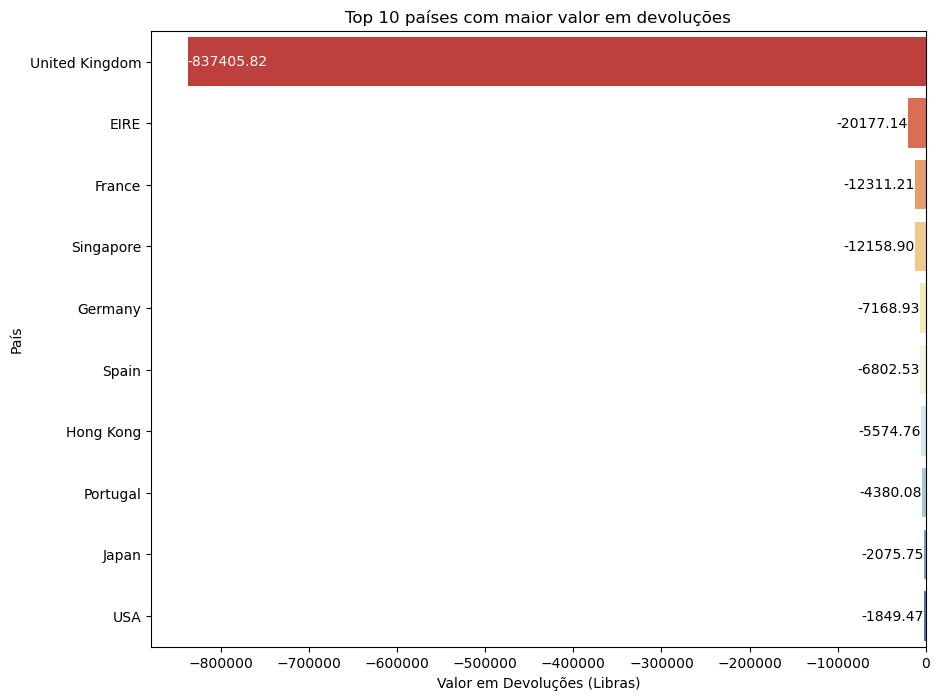

In [32]:
# Selecionando os 10 países com maior número de devoluções
top_paises_devolucoes = devolvidos.groupby('País')['Valor'].sum().sort_values(ascending=True).head(10).reset_index()

# Criando um gráfico de barras verticais com escala de cor
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Valor', y='País', data=top_paises_devolucoes, palette='RdYlBu', orient='h')

# Adicionando as legendas nas barras    
for i, p in enumerate(ax.patches):
    width = p.get_width()
    if i == 0:
        # Mudando o posicionamento e a cor da legenda da primeira barra
        plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='left', va='center', color='white')
    else:
        # Adiciona a legenda para as demais barras posicionada do lado de fora da barra
        plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='right', va='center')

plt.title('Top 10 países com maior valor em devoluções')
plt.xlabel('Valor em Devoluções (Libras)')
plt.ylabel('País')

plt.show()

In [33]:
# Verificando as estruturas atuais dos Dataframes
vendas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19124 entries, 0 to 19946
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   N° da fatura    19124 non-null  object        
 1   Data da fatura  19124 non-null  datetime64[ns]
 2   ID Cliente      17742 non-null  float64       
 3   País            19124 non-null  object        
 4   Quantidade      19124 non-null  int64         
 5   Valor           19124 non-null  float64       
 6   Horario         19124 non-null  object        
 7   DataBR          19124 non-null  object        
 8   Mês             19124 non-null  period[M]     
 9   Mês e Ano       19124 non-null  period[M]     
 10  Dia do Mês      19124 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4), period[M](2)
memory usage: 1.7+ MB


In [34]:
devolvidos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5173 entries, 0 to 5173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   N° da fatura    5173 non-null   object        
 1   Data da fatura  5173 non-null   datetime64[ns]
 2   ID Cliente      3653 non-null   float64       
 3   País            5173 non-null   object        
 4   Quantidade      5173 non-null   int64         
 5   Valor           5173 non-null   float64       
 6   Horario         5173 non-null   object        
 7   DataBR          5173 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 363.7+ KB


### Relação entre o Total de Vendas e o Total de Devoluções

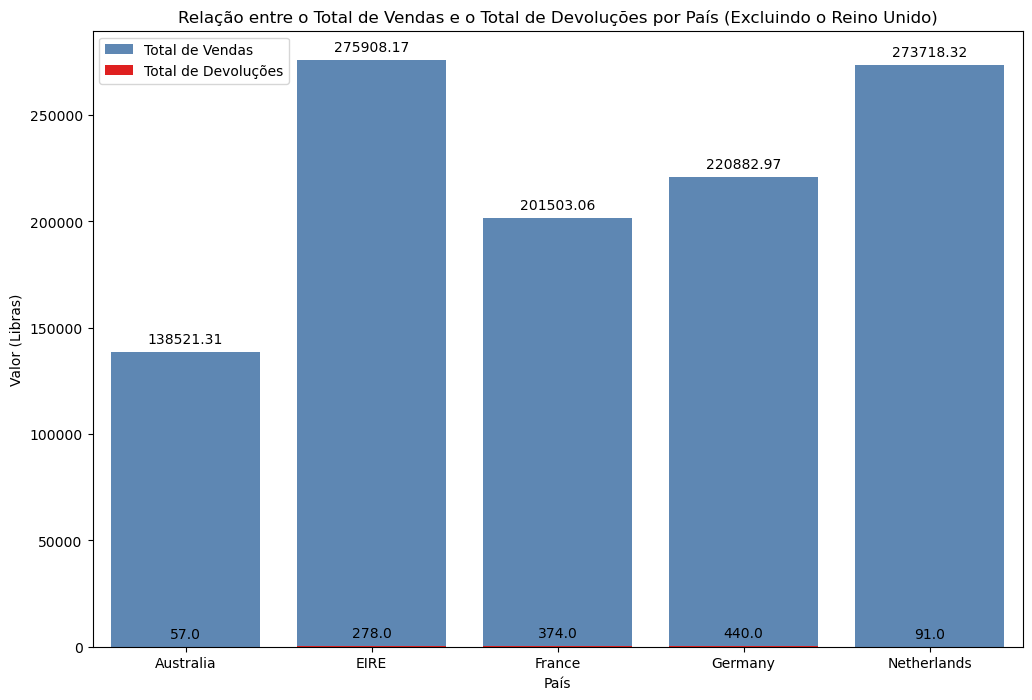

In [35]:
# Excluindo 'United Kingdom' dos cálculos
vendas_sem_uk = vendas[vendas['País'] != 'United Kingdom']

# Selecionando os cinco países com maior total de vendas
top_paises_vendas = vendas_sem_uk.groupby('País')['Valor'].sum().sort_values(ascending=False).head(5).index

# Filtrando as vendas apenas para esses países
vendas_top_paises = vendas_sem_uk[vendas_sem_uk['País'].isin(top_paises_vendas)]

# Agrupando os dados por país e calculando o total de vendas e devoluções
agregado_paises = vendas_top_paises.groupby('País')['Valor'].agg(['sum', 'count']).reset_index()
agregado_paises.columns = ['País', 'Total de Vendas', 'Total de Devoluções']

# Criando um gráfico de barras verticais
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='País', y='Total de Vendas', data=agregado_paises, color='#5086c1', label='Total de Vendas')
ax = sns.barplot(x='País', y='Total de Devoluções', data=agregado_paises, color='red', label='Total de Devoluções')

# Adicionando rótulos e título
plt.title('Relação entre o Total de Vendas e o Total de Devoluções por País (Excluindo o Reino Unido)')
plt.xlabel('País')
plt.ylabel('Valor (Libras)')
plt.legend()

# Adicionando os valores no topo das barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()

## Clientes

In [36]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19124 entries, 0 to 19946
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   N° da fatura    19124 non-null  object        
 1   Data da fatura  19124 non-null  datetime64[ns]
 2   ID Cliente      17742 non-null  float64       
 3   País            19124 non-null  object        
 4   Quantidade      19124 non-null  int64         
 5   Valor           19124 non-null  float64       
 6   Horario         19124 non-null  object        
 7   DataBR          19124 non-null  object        
 8   Mês             19124 non-null  period[M]     
 9   Mês e Ano       19124 non-null  period[M]     
 10  Dia do Mês      19124 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4), period[M](2)
memory usage: 1.7+ MB


In [37]:
vendas['ID Cliente'].nunique()

4292

### Recorrência de compras e fidelidade entre os clientes

In [38]:
#verificando os 10 primeiros clientes que mais compraram
vendas.groupby(['ID Cliente','País'])['N° da fatura'].nunique().sort_values(ascending=False).head(10).reset_index()

,ID Cliente,País,N° da fatura
0,12748.0,United Kingdom,200
1,14911.0,EIRE,192
2,17841.0,United Kingdom,120
3,13089.0,United Kingdom,93
4,14606.0,United Kingdom,91
5,15311.0,United Kingdom,88
6,12971.0,United Kingdom,84
7,14646.0,Netherlands,70
8,16029.0,United Kingdom,63
9,13408.0,United Kingdom,59


In [39]:
# Agrupando as vendas por ID do cliente e pais
resultado_top_clientes = vendas.groupby(['ID Cliente', 'País']).agg({
    'N° da fatura': 'nunique','Valor': ['sum', 'mean']
    }).sort_values(by=('N° da fatura', 'nunique'), ascending=False).head(10).reset_index()

# Renomeie as colunas para maior clareza
resultado_top_clientes.columns = ['ID Cliente', 'País', 'Faturas Únicas', 'Valor Total', 'Valor Médio por Fatura']

# Exibindo o resultado
print(resultado_top_clientes)

   ID Cliente            País  Faturas Únicas  Valor Total  Valor Médio por Fatura
0     12748.0  United Kingdom             200     32413.39              162.066950
1     14911.0            EIRE             192    136641.24              711.673125
2     17841.0  United Kingdom             120     38435.26              320.293833
3     13089.0  United Kingdom              93     54144.21              582.195806
4     14606.0  United Kingdom              91     11754.08              129.165714
5     15311.0  United Kingdom              88     59591.83              677.179886
6     12971.0  United Kingdom              84     11028.01              131.285833
7     14646.0     Netherlands              70    268478.00             3835.400000
8     16029.0  United Kingdom              63     81024.84             1286.108571
9     13408.0  United Kingdom              59     26708.42              452.685085


In [40]:
# Filtrando as vendas apenas para clientes do 'United Kingdom'
vendas_uk = vendas[vendas['País'] == 'United Kingdom']

# Contando o número de faturas únicas por cliente
faturas_por_cliente = vendas_uk.groupby('ID Cliente')['N° da fatura'].nunique()

# Contando o número de clientes com mais de uma fatura
clientes_recorrentes = (faturas_por_cliente > 1).sum()

# Total de clientes no 'United Kingdom'
total_clientes_uk = vendas_uk['ID Cliente'].nunique()

# Calculando a porcentagem de clientes recorrentes
porcentagem_clientes_recorrentes = (clientes_recorrentes / total_clientes_uk) * 100

print(f'Porcentagem de clientes no United Kingdom que voltam a comprar: {porcentagem_clientes_recorrentes:.2f}%')

Porcentagem de clientes no United Kingdom que voltam a comprar: 64.10%


In [41]:
# Repetindo o mesmo processo para os clientes fora do 'United Kingdom'
vendas_fora_uk = vendas[vendas['País'] != 'United Kingdom']

faturas_por_cliente_fora_uk = vendas_fora_uk.groupby('ID Cliente')['N° da fatura'].nunique()

clientes_recorrentes_fora_uk = (faturas_por_cliente_fora_uk > 1).sum()

total_clientes_fora_uk = vendas_fora_uk['ID Cliente'].nunique()

porcentagem_clientes_recorrentes_fora_uk = (clientes_recorrentes_fora_uk / total_clientes_fora_uk) * 100

print(f'Porcentagem de clientes recorrentes fora do United Kingdom: {porcentagem_clientes_recorrentes_fora_uk:.2f}%')

Porcentagem de clientes recorrentes fora do United Kingdom: 64.78%


/tmp/ipykernel_5171/1668871876.py:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(legendas, loc='center right', bbox_to_anchor=(1.1, 0.5), title="Fidelidade dos Clientes", labels=legendas)


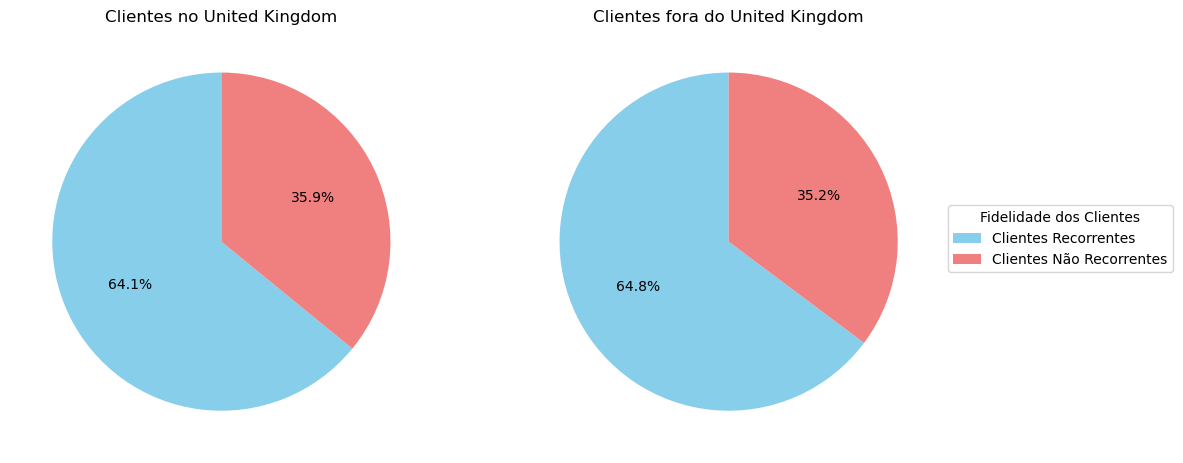

In [42]:
#Configuração do gráfico
legendas = ['Clientes Recorrentes', 'Clientes Não Recorrentes']
cores = ['skyblue', 'lightcoral']

# Dados dos clientes no 'United Kingdom'
sizes_uk = [clientes_recorrentes, total_clientes_uk - clientes_recorrentes]

# Dados dos clientes fora do 'United Kingdom'
sizes_fora_uk = [clientes_recorrentes_fora_uk, total_clientes_fora_uk - clientes_recorrentes_fora_uk]

# Criando subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de pizza para clientes no 'United Kingdom'
axs[0].pie(sizes_uk, labels=None, autopct='%1.1f%%', startangle=90, colors=cores)
axs[0].set_title('Clientes no United Kingdom')

# Gráfico de pizza para clientes no fora do 'United Kingdom'
axs[1].pie(sizes_fora_uk, labels=None, autopct='%1.1f%%', startangle=90, colors=cores)
axs[1].set_title('Clientes fora do United Kingdom')

# Adicionando uma única legenda
fig.legend(legendas, loc='center right', bbox_to_anchor=(1.1, 0.5), title="Fidelidade dos Clientes", labels=legendas)

plt.show()

### Porcentual de recorrência de compras independente da quantidade

In [43]:
vendas_fora_uk = vendas[vendas['País'] != 'United Kingdom']

# Contar o número de compras por cliente e país
compras_por_cliente_pais = vendas_fora_uk.groupby(['ID Cliente', 'País']).size().reset_index(name='NumCompras')

# Filtrar clientes que realizaram mais de uma compra
clientes_recorrentes = compras_por_cliente_pais[compras_por_cliente_pais['NumCompras'] > 1]

# Calcular o número total de clientes por país
total_clientes_por_pais = compras_por_cliente_pais.groupby('País')['ID Cliente'].nunique()

# Calcular o número de clientes recorrentes por país
clientes_recorrentes_por_pais = clientes_recorrentes.groupby('País')['ID Cliente'].nunique()

# Calcular o percentual de clientes recorrentes por país
percentual_clientes_recorrentes_por_pais = (clientes_recorrentes_por_pais / total_clientes_por_pais) * 100

# Criar a tabela
tabela_percentual_clientes_recorrentes = pd.DataFrame({
    'Total de Clientes': total_clientes_por_pais,
    'Clientes Recorrentes': clientes_recorrentes_por_pais,
    'Percentual de Clientes Recorrentes': percentual_clientes_recorrentes_por_pais
})

# Ordenar a tabela em ordem decrescente pelo percentual de clientes recorrentes
tabela_percentual_clientes_recorrentes = tabela_percentual_clientes_recorrentes.sort_values(by='Percentual de Clientes Recorrentes', ascending=False).head(10)

# Exibir a tabela
display(tabela_percentual_clientes_recorrentes)

,Total de Clientes,Clientes Recorrentes,Percentual de Clientes Recorrentes
País,,,
Australia,9,9.0,100.000000
Singapore,1,1.0,100.000000
Czech Republic,1,1.0,100.000000
EIRE,3,3.0,100.000000
Lithuania,1,1.0,100.000000
Iceland,1,1.0,100.000000
Denmark,8,6.0,75.000000
Belgium,25,18.0,72.000000
Switzerland,21,15.0,71.428571


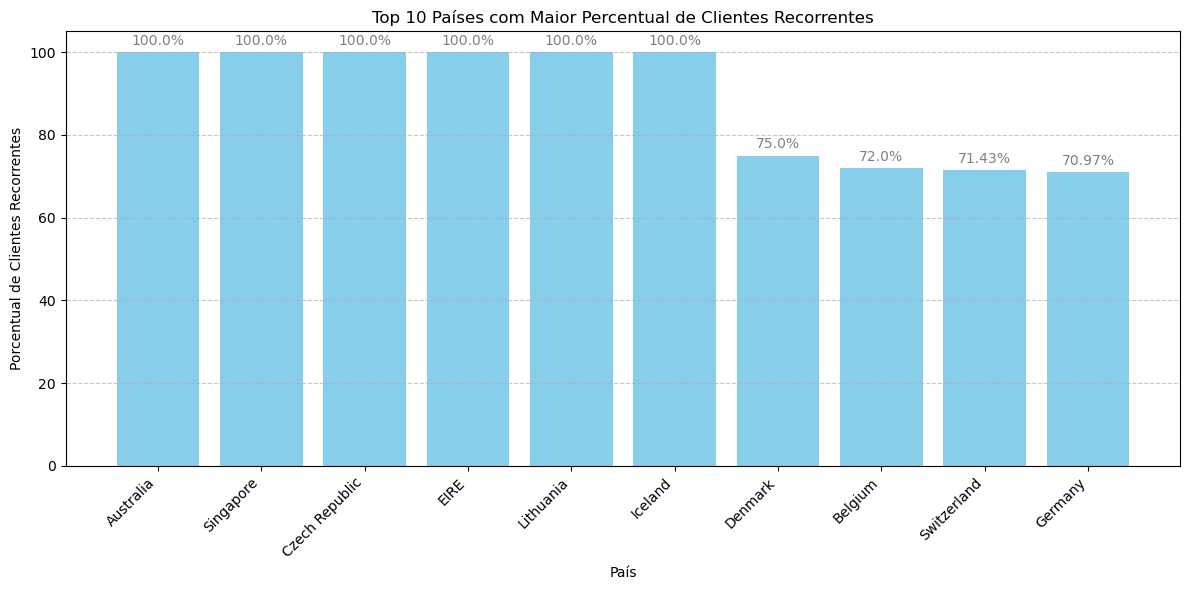

In [44]:
# Selecionar os top 10 países com maior percentual de clientes recorrentes
top10_paises = tabela_percentual_clientes_recorrentes.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(top10_paises.index, top10_paises['Percentual de Clientes Recorrentes'], color='skyblue')
plt.xlabel('País')
plt.ylabel('Porcentual de Clientes Recorrentes')
plt.title('Top 10 Países com Maior Percentual de Clientes Recorrentes')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor leitura

# Adicionar os valores com símbolo de porcentagem no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{round(yval, 2)}%', ha='center', va='bottom', color='grey')

# Adicionar linhas de grade
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Ajustar o layout para evitar cortar rótulos

plt.show()

### Porcentual de recorrência de compras nos mercados com maior volume de pedidos

In [45]:
vendas_fora_uk = vendas[vendas['País'] != 'United Kingdom']

# Contar o número de compras por cliente e país
compras_por_cliente_pais = vendas_fora_uk.groupby(['ID Cliente', 'País']).size().reset_index(name='NumCompras')

# Filtrar clientes que realizaram mais de uma compra
clientes_recorrentes = compras_por_cliente_pais[compras_por_cliente_pais['NumCompras'] > 1]

# Calcular o número total de clientes por país
total_clientes_por_pais = compras_por_cliente_pais.groupby('País')['ID Cliente'].nunique()

# Calcular o número de clientes recorrentes por país
clientes_recorrentes_por_pais = clientes_recorrentes.groupby('País')['ID Cliente'].nunique()

# Calcular o percentual de clientes recorrentes por país
percentual_clientes_recorrentes_por_pais = (clientes_recorrentes_por_pais / total_clientes_por_pais) * 100

# Criar a tabela
tabela_qtd_clientes_recorrentes = pd.DataFrame({
    'Total de Clientes': total_clientes_por_pais,
    'Clientes Recorrentes': clientes_recorrentes_por_pais,
    'Percentual de Clientes Recorrentes': percentual_clientes_recorrentes_por_pais
})

# Ordenar a tabela em ordem decrescente pelo percentual de clientes recorrentes
tabela_qtd_clientes_recorrentes = tabela_qtd_clientes_recorrentes.sort_values(by='Clientes Recorrentes', ascending=False).head(10)

# Exibir a tabela
display(tabela_qtd_clientes_recorrentes)

,Total de Clientes,Clientes Recorrentes,Percentual de Clientes Recorrentes
País,,,
Germany,93,66.0,70.967742
France,86,57.0,66.279070
Spain,29,19.0,65.517241
Belgium,25,18.0,72.000000
Switzerland,21,15.0,71.428571
Portugal,19,11.0,57.894737
Australia,9,9.0,100.000000
Finland,11,7.0,63.636364
Denmark,8,6.0,75.000000


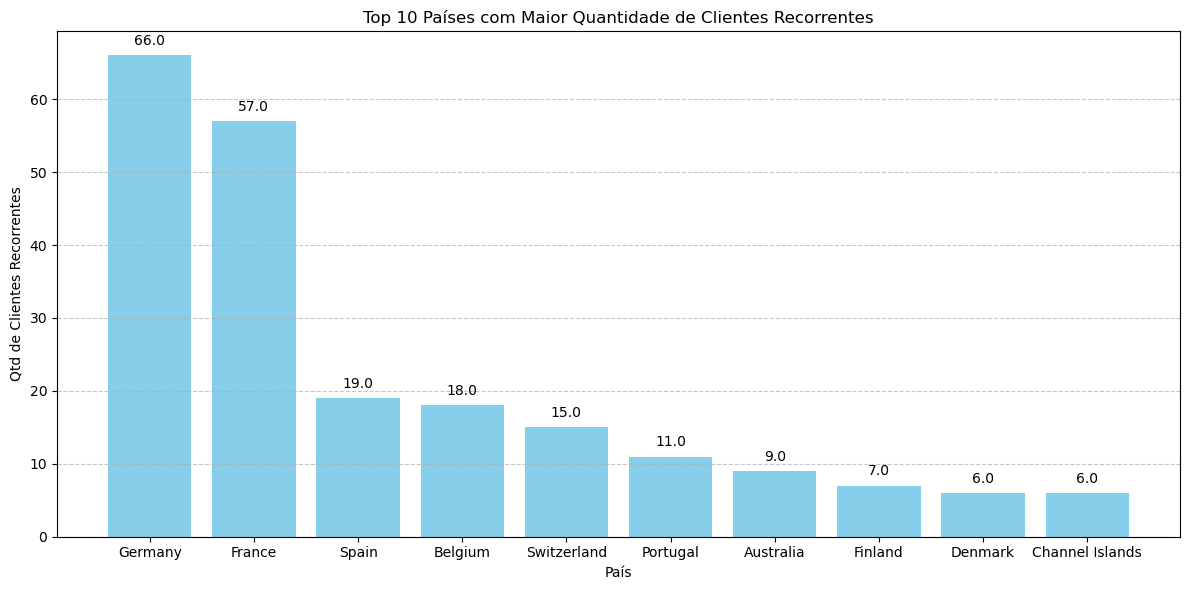

In [46]:
# Selecionar os top 10 países com maior quantidade de clientes recorrentes
top10_paises = tabela_qtd_clientes_recorrentes.sort_values(by='Clientes Recorrentes', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top10_paises.index, top10_paises['Clientes Recorrentes'], color='skyblue')
plt.xlabel('País')
plt.ylabel('Qtd de Clientes Recorrentes')
plt.title('Top 10 Países com Maior Quantidade de Clientes Recorrentes')
plt.xticks(rotation=0, ha='center')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{round(yval, 2)}', ha='center', va='bottom')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()
